In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from constants import SimConstants as sconst

## Analysis

In [21]:
data_csv = pd.read_csv('./data/data.csv')
data_csv

,position_x,position_y,velocity_x,velocity_y,force_x,force_y,pressure,person_state
0,24.673856,38.887690,0.000000,0.000000,0.0,0.0,0.0,0.0
1,12.720306,21.334007,0.000000,0.000000,0.0,0.0,0.0,0.0
2,10.205819,37.616792,0.000000,0.000000,0.0,0.0,0.0,0.0
3,5.970910,35.153663,0.000000,0.000000,0.0,0.0,0.0,0.0
4,12.164626,42.230165,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
299995,39.620357,25.188122,0.392024,-52.932848,0.0,0.0,0.0,2.0
299996,37.981158,21.400575,-1.360294,29.977573,0.0,0.0,0.0,2.0
299997,41.853643,31.754580,1.497592,-13.238876,0.0,0.0,0.0,2.0
299998,39.392880,22.633659,-11.872631,3.923779,0.0,0.0,0.0,2.0


In [22]:
data_arr = data_csv.to_numpy()
data = data_arr.reshape(sconst.n_time_steps, -1, *data_arr.shape[1:])
print(data.shape)

(1000, 300, 8)


Text(0.5, 0, 'Time [s]')

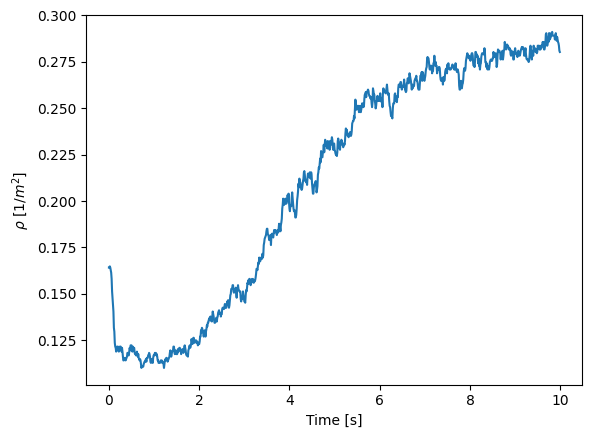

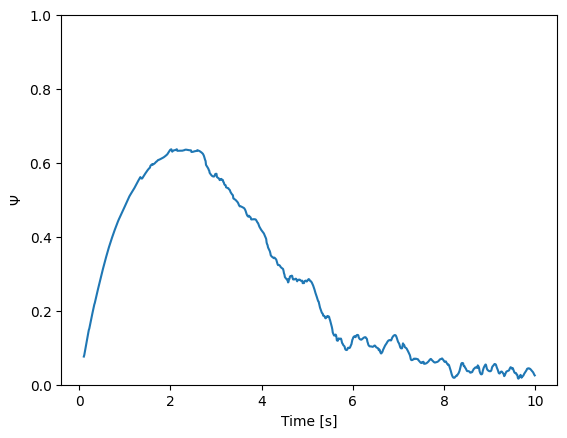

In [23]:
%matplotlib inline

avg_densities = np.zeros(sconst.n_time_steps)
allign_coefs = np.zeros(sconst.n_time_steps)

for t in range(sconst.n_time_steps):
    positions = data[t, :, 0:2]
    velocities = data[t, :, 2:4]
    forces = data[t, :, 4:6]
    pressures = data[t, :, 6]
    person_state = data[t, :, 7]

    velocities[person_state > 0] = 0
    
    counts = np.zeros(sconst.n_individuals)
    
    mean_velocity = np.linalg.norm(np.mean(velocities, axis=0))+0.000000001
    sum_velocity = np.sum(velocities/sconst.v_max, axis=0)
    allign_coefs[t] = np.linalg.norm(sum_velocity)
    
    for i in range(sconst.n_individuals):
        circle_rad = 1
        circle_area = circle_rad*np.pi*np.pi
        distances = np.linalg.norm(positions[i] - positions, axis=1)
        counts[i] = np.sum(distances < circle_rad)

    avg_densities[t] = np.mean(counts)/circle_area
    
allign_coefs /= sconst.n_individuals
        
time_steps = np.arange(sconst.n_time_steps)
        
fig = plt.figure()
plt.plot(time_steps * sconst.time_inc, avg_densities)
plt.xlabel("Time [s]")
plt.ylabel(r"$\rho \ [1/m^2]$")

fig = plt.figure()
plt.plot(time_steps[10:] * sconst.time_inc, allign_coefs[10:])
plt.ylim((0,1))
plt.ylabel(r"$\Psi$")
plt.xlabel("Time [s]")

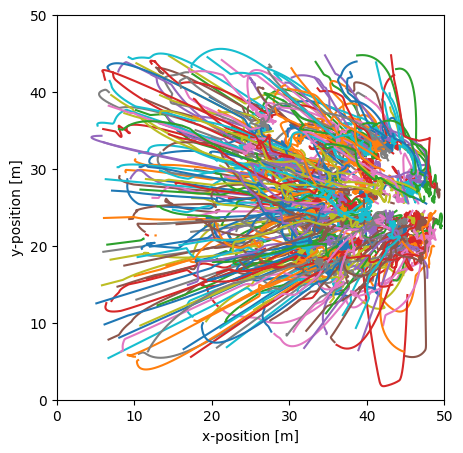

In [25]:
fig = plt.figure(figsize=(5,5))
plt.xlim(0, sconst.max_pos[0])
plt.ylim(0, sconst.max_pos[1])
particles = np.arange(300)

plt.xlabel("x-position [m]")
plt.ylabel("y-position [m]")
plt.plot(data[:, particles, 0], data[:, particles, 1]);

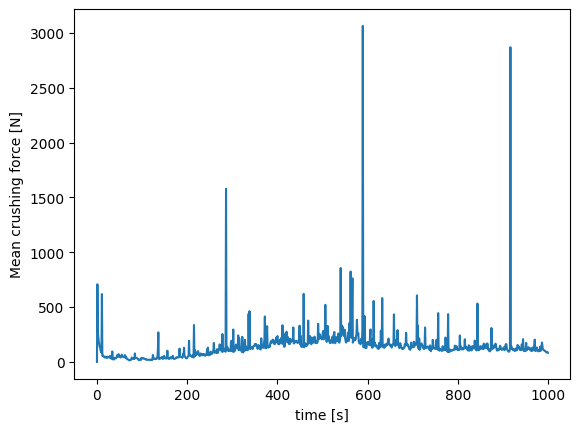

In [26]:
living_states = data[:, :, 7]
pressures = data[living_states==0, 6]
fig = plt.figure()
plt.xlabel("time [s]")
plt.ylabel("Mean crushing force [N]")
plt.plot(time_steps, np.mean(data[:, :, 6], axis=1));